In [7]:
import os
import pathlib
import sys
import ipykernel
import numpy as np
import matplotlib.pyplot as plt

# 获取当前Notebook的路径
notebook_path = os.getcwd()
# 将父目录添加到sys.path中
sys.path.insert(0, os.path.join(notebook_path, "../bandit/"))
sys.path.insert(0, os.path.join(notebook_path, "../algos/"))

print(sys.path)

from k_arm_bandit import BanditMachine
from epsilon_greedy import EpsilonGreedy


['c:\\Users\\isrya\\#MyFiles\\#MyCode\\GithubUoL532\\COMP532-CA1\\notebooks\\../algos/', 'c:\\Users\\isrya\\#MyFiles\\#MyCode\\GithubUoL532\\COMP532-CA1\\notebooks\\../bandit/', 'c:\\Users\\isrya\\#MyFiles\\#MyCode\\GithubUoL532\\COMP532-CA1\\notebooks\\../algos/', 'c:\\Users\\isrya\\#MyFiles\\#MyCode\\GithubUoL532\\COMP532-CA1\\notebooks\\../bandit/', 'c:\\Users\\isrya\\#MyFiles\\#MyCode\\GithubUoL532\\COMP532-CA1\\notebooks\\../algos/', 'c:\\Users\\isrya\\#MyFiles\\#MyCode\\GithubUoL532\\COMP532-CA1\\notebooks\\../bandit/', 'c:\\Users\\isrya\\#MyFiles\\#MyCode\\GithubUoL532\\COMP532-CA1\\notebooks', 'c:\\Users\\isrya\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'c:\\Users\\isrya\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'c:\\Users\\isrya\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'c:\\Users\\isrya\\AppData\\Local\\Programs\\Python\\Python310', '', 'C:\\Users\\isrya\\AppData\\Roaming\\Python\\Python310\\site-packages', 'C:\\Users\\isrya\\AppData\\R

In [40]:
# 初始化多臂老虎机
bandits = BanditMachine(10)
for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  0.7117170369991488
arm:  1 miu:  -1.1047850881597892
arm:  2 miu:  -1.1327012864736297
arm:  3 miu:  -0.7068617132731652
arm:  4 miu:  -0.1951721570827374
arm:  5 miu:  0.17893204195070211
arm:  6 miu:  0.512025593017802
arm:  7 miu:  1.7111285721515699
arm:  8 miu:  0.6911549479106439
arm:  9 miu:  1.2602385940020304


In [51]:
bandits.miu_list = [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]

for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  -1
arm:  1 miu:  -1
arm:  2 miu:  -1
arm:  3 miu:  -1
arm:  4 miu:  -1
arm:  5 miu:  -1
arm:  6 miu:  -1
arm:  7 miu:  -1
arm:  8 miu:  -1
arm:  9 miu:  1


In [26]:
# 初始化 Episilon-greedy 算法
e = 0.1
e_greedy_bandits = EpsilonGreedy(bandits, e)

In [27]:
# 运行 Epsilon-Greedy 算法
for _ in range(25):
    chosen_arm, reward = e_greedy_bandits.play()
    print("chosen_arm: ", chosen_arm, "reward: ", reward)
    

chosen_arm:  0 reward:  -0.26989540699059794
chosen_arm:  1 reward:  -0.2845336441489626
chosen_arm:  2 reward:  -0.9338121170180489
chosen_arm:  3 reward:  0.6009154695451665
chosen_arm:  4 reward:  -0.23111061413956635
chosen_arm:  5 reward:  -0.038228864198460166
chosen_arm:  6 reward:  1.2259964463487176
chosen_arm:  7 reward:  0.4011171122076353
chosen_arm:  8 reward:  -0.07475861506394521
chosen_arm:  9 reward:  3.048624846674618
chosen_arm:  9 reward:  1.3572376004911297
chosen_arm:  9 reward:  2.603286329398459
chosen_arm:  9 reward:  2.6945170252781505
chosen_arm:  9 reward:  1.8567737775426547
chosen_arm:  9 reward:  1.630373274389982
chosen_arm:  9 reward:  2.407613680403427
chosen_arm:  9 reward:  2.7031553234060866
chosen_arm:  9 reward:  1.139010539788303
chosen_arm:  9 reward:  -0.6636879076794671
chosen_arm:  9 reward:  1.7227830137384577
chosen_arm:  9 reward:  4.00102490764519
chosen_arm:  9 reward:  0.38384376223770755
chosen_arm:  9 reward:  2.0045040366315945
chose

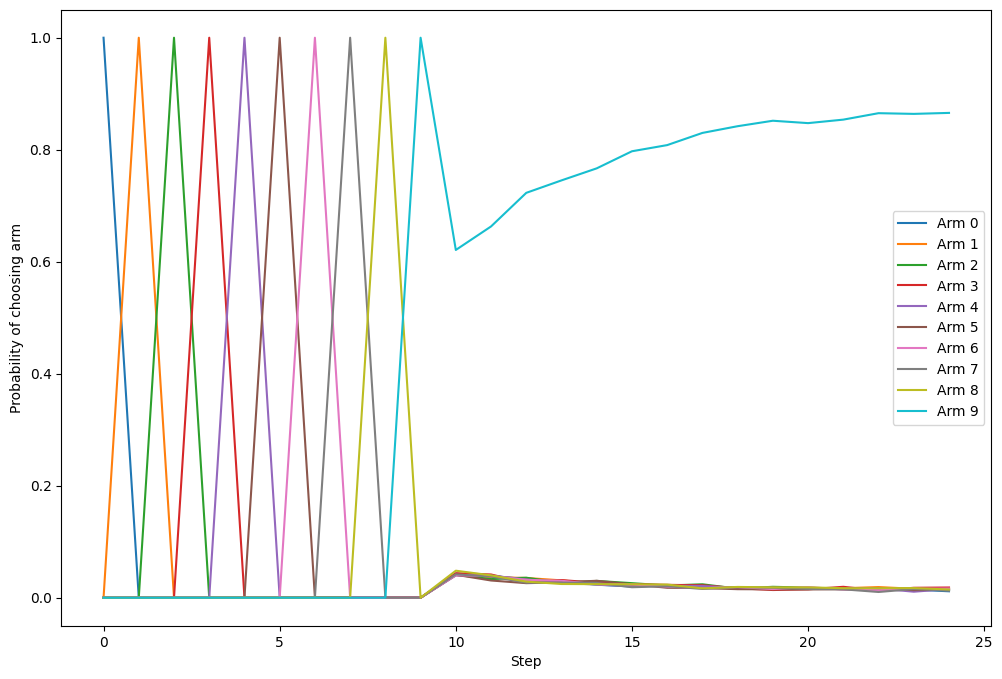

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化 Epsilon-greedy 算法
e = 0.1
# e_greedy_bandits = EpsilonGreedy(bandits, e)

# 初始化 轮数
total_rounds = 4000

# 初始化 每轮运行的步数
total_steps = 25

# 用于记录每一步每个臂被选择的次数
arm_counts = np.zeros((total_steps, bandits.n_arms))

# 运行 Epsilon-Greedy 算法 100 遍
for _ in range(total_rounds):
    e_greedy_bandits = EpsilonGreedy(bandits, e)  # 为每轮运行重新初始化
    for step in range(total_steps):
        chosen_arm, _ = e_greedy_bandits.play()
        arm_counts[step, chosen_arm] += 1

# 将次数转换为概率
arm_probabilities = arm_counts / total_rounds

# 绘制每一步选择每个臂的概率
plt.figure(figsize=(12, 8))
for arm in range(bandits.n_arms):
    plt.plot(arm_probabilities[:, arm], label=f'Arm {arm}')
plt.xlabel('Step')
plt.ylabel('Probability of choosing arm')
plt.legend()
plt.show()
